# Deep_Learning_from_Scratch_2 - part1

#### 딥러닝의 기본적인 내용을 정리하였습니다. 밑바닥부터 시작하는 딥러닝2(사이토 고키 지음)을 참고하였습니다. 

## 2. 자연어와 단어의 분산 표현
#### - 자연어 처리의 본질적 문제는 컴퓨터가 우리의 말을 이해하게 만드는 것이다. 
### 2.1 자연어 처리란
#### - 자연어 처리(NLP) : 우리의 말을 컴퓨터에게 이해시키기 위한 기술
#### 2.1.1 단어의 의미 
#### - 단어 : 의미의 최소 단위, 자연어를 컴퓨터에게 이해시키기 위해서는 '단어의 의미'를 이해시키는 것이 중요
#### - Thesaurus(유의어 사전) / 통계 기반 기법

### 2.2 Thesaurus
#### - 유의어 사전, 뜻이 같은 단어(동의어)
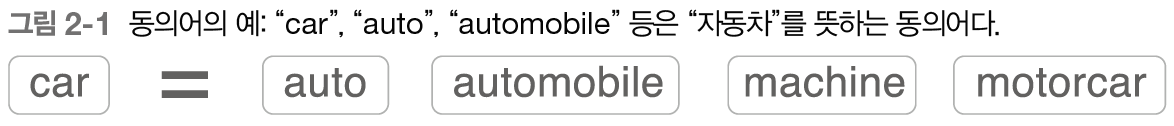
#### - 단어 사이의 '상위와 하위', '전체와 부분' 등 세세한 관계까지 정의해둔 경우도 존재
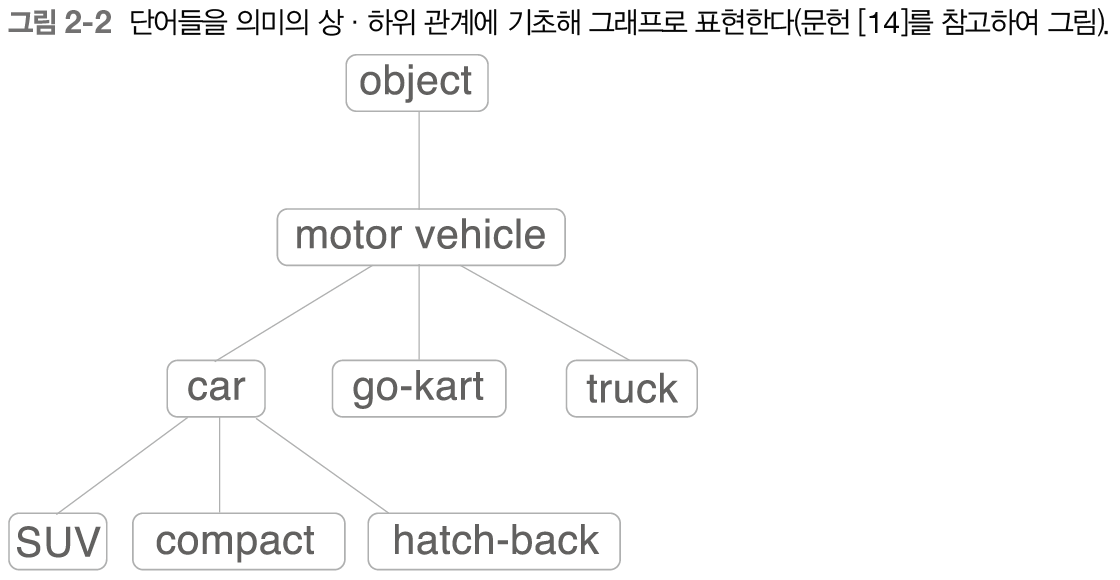

#### 2.2.1 WordNet
#### - 대표적인 Thesaurus, 유의어를 얻거나 단어 네트워크 활용 가능, 단어 사이의 유사도 계산 가능
#### 2.2.2 Thesaurus의 문제점
#### - 시대 변화에 대응하기 어려움 / 사람을 쓰는 비용이 큼 / 단어의 미묘한 차이 반영 불가

### 2.3 통계 기반 기법 
#### - 말뭉치(Corpus) : 자연어 처리 연구 등을 염두에 두고 수집된 텍스트 데이터, 사람의 '지식'이 충분히 담겨 있다고 볼 수 있음
#### - 말물치에서 자동으로, 효율적으로 핵심을 추출하는 것이 목표
#### 2.3.1 파이썬으로 말뭉치 전처리하기

In [2]:
text = 'You say goodbye and I say hello.'

text = text.lower()
text = text.replace('.', ' .')
print(text)

words = text.split(' ')
print(words)

you say goodbye and i say hello .
['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']


In [4]:
word_to_id = {}
id_to_word = {}
for word in words:
    if word not in word_to_id:
        new_id = len(word_to_id)
        word_to_id[word] = new_id
        id_to_word[new_id] = word
        
print(id_to_word)
print(word_to_id)
print(id_to_word[1])
print(word_to_id['hello'])

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}
{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}
say
5


In [5]:
import numpy as np
corpus = [word_to_id[w] for w in words]
corpus = np.array(corpus)
print(corpus)

[0 1 2 3 4 1 5 6]


In [6]:
def preprocess(text):
    text = text.lower()
    text = text.replace('.', ' .')
    words = text.split(' ')
    word_to_id = {}
    id_to_word = {}
    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word
    corpus = np.array([word_to_id[w] for w in words])
    
    return corpus, word_to_id, id_to_word

In [7]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

#### 2.3.2 단어의 분산 표현
#### - Distibutional representaion : 단어의 의미를 정확하게 파악할 수 있는 벡터 표현

#### 2.3.3 분포 가설
#### - 분포 가설 : 단어의 의미는 주변 단어에 의해 형성된다. / 단어 자체에는 의미가 없고, 그 단어가 사용된 '맥락'(관심을 두는 단어의 주변 단어들)이 의미를 형성한다. 
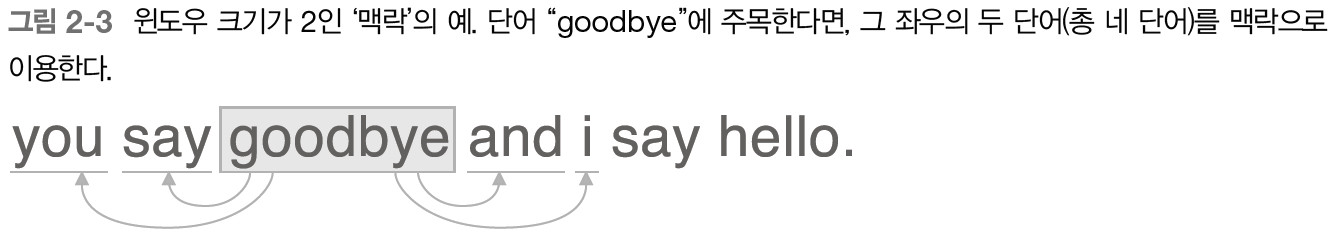

#### 2.3.4 동시발생 행렬
#### - 통계 기반 기법 : 중심 단어의 주변에 어떤 단어가 몇 번이냐 등장하는 지 세어 집계하는 방법

In [8]:
import numpy as np
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
print(corpus)
print(id_to_word)

[0 1 2 3 4 1 5 6]
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


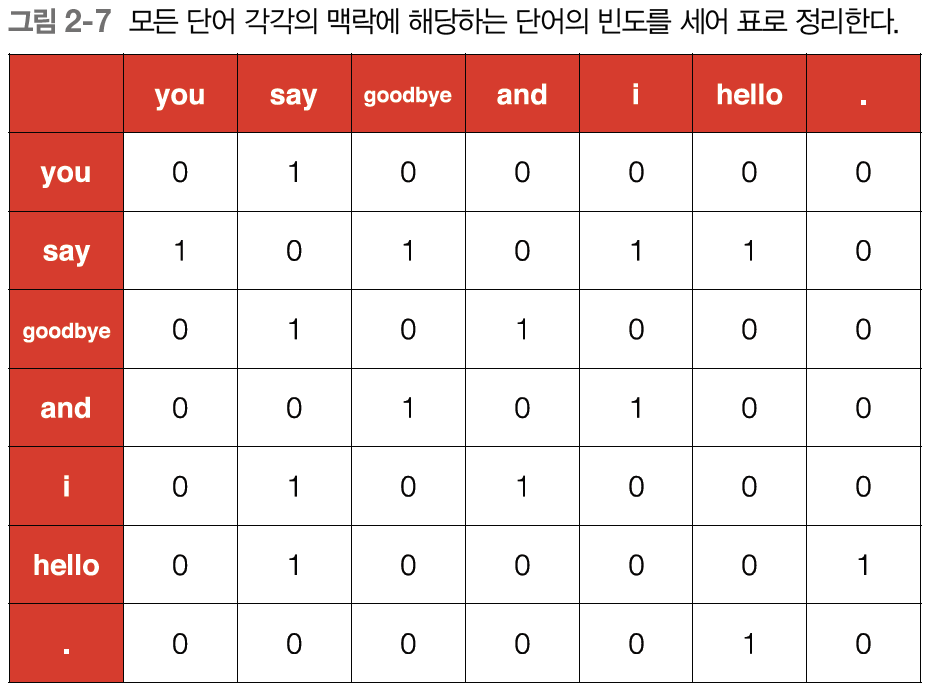

In [13]:
def create_co_matrix(corpus, vocab_size, window_size=1):
    corpus_size = len(corpus)
    co_matrix = np.zeros((vocab_size, vocab_size), dtype = np.int32)
    
    for idx, word_id in enumerate(corpus):
        for i in range(1, window_size+1):
            left_idx = idx - i
            right_idx = idx + i
            
            if left_idx >=0:
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id] +=1
                
            if right_idx < corpus_size:
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id] +=1
    return co_matrix

#### 2.3.5 벡터 간 유사도
#### - 코사인 유사도
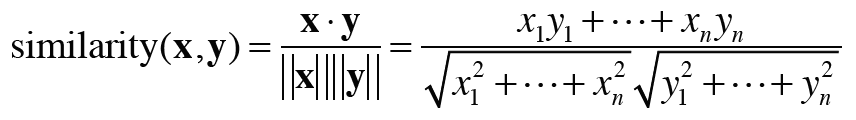

In [11]:
def cos_similarity(x, y, eps=1e-8):
    nx = x /(np.sqrt(np.sum(x**2))+eps)
    ny = y / (np.sqrt(np.sum(y**2))+eps)
    return np.dot(nx, ny)

In [14]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

c0 = C[word_to_id['you']]
c1 = C[word_to_id['i']]
print(cos_similarity(c0, c1))

0.7071067691154799


#### 2.3.6 유사 단어의 랭킹 표시

In [15]:
def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
    if query not in word_to_id:
        print('{}을 찾을 수 없습니다'.format(query))
        return
    print('\n[query] ' + query)
    query_id = word_to_id[query]
    query_vec = word_matrix[query_id]
    
    vocab_size = len(id_to_word)
    similarity = np.zeros(vocab_size)
    for i in range(vocab_size):
        similarity[i] = cos_similarity(word_matrix[i], query_vec)
        
    count = 0
    for i in (-1 * similarity).argsort():
        if id_to_word[i] == query:
            continue
        print(' {}: {}'.format(id_to_word[i], similarity[i]))
        
        count +=1
        if count >= top:
            return

In [16]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

most_similar('you', word_to_id, id_to_word, C, top=5)


[query] you
 goodbye: 0.7071067691154799
 i: 0.7071067691154799
 hello: 0.7071067691154799
 say: 0.0
 and: 0.0


### 2.4 통계 기반 기법 개선하기
#### 2.4.1 상호정보량 
#### - 점별 상호정보량(PMI) : 클 수록 관련성이 높음, 단어가 단독으로 춣현하는 횟수를 고려
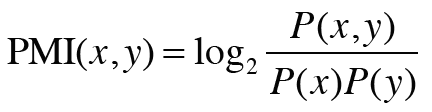
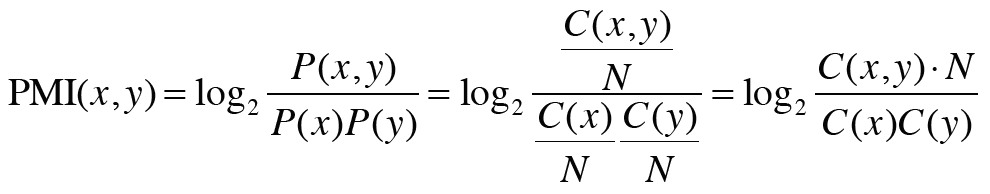
#### - 양의 상호정보량(PPMI)
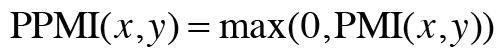

In [17]:
def ppmi(C, verbose=False, eps=1e-8):
    M = np.zeros_like(C, dtype=np.float32)
    N = np.sum(C)
    S = np.sum(C, axis = 0)
    total = C.shape[0] * C.shape[1]
    cnt = 0
    
    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            pmi = np.log2(C[i, j] * N / (S[j]* S[i]) + eps)
            M[i,j] = max(0, pmi)
            
            if verbose:
                cnt +=1
                if cnt % (total//100 +1) == 0:
                    print('%.1f%% 완료' % (100*cnt/total))
    return M

In [18]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

np.set_printoptions(precision=3)
print('동시발생 행렬')
print(C)
print('-'*50)
print('PPMI')
print(W)

동시발생 행렬
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


#### 2.4.2 차원감소
#### - 차원 감소 : 중요한 정보를 최대한 유지하면서 벡터의 차원을 줄이는 방법, 데이터의 분포를 고려해 중요한 '축'을 찾는 일을 수행
#### - 특이값분해(SVD) : U, V(직교행렬), S(대각행렬)
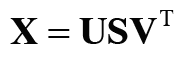
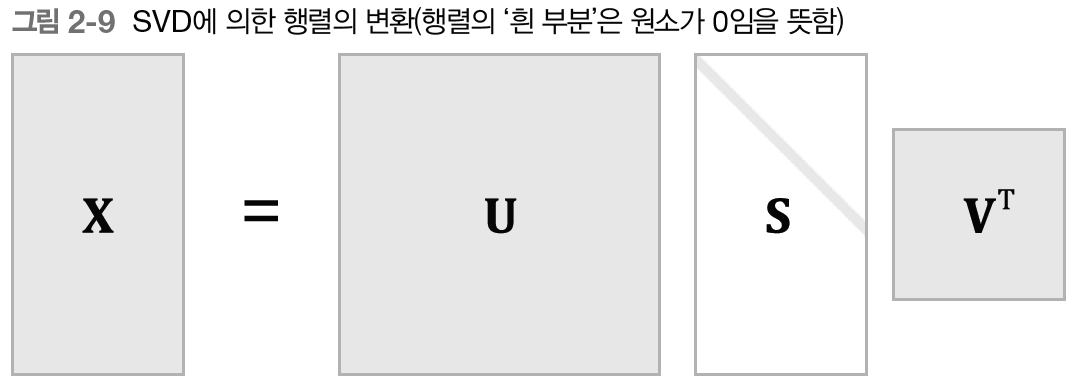
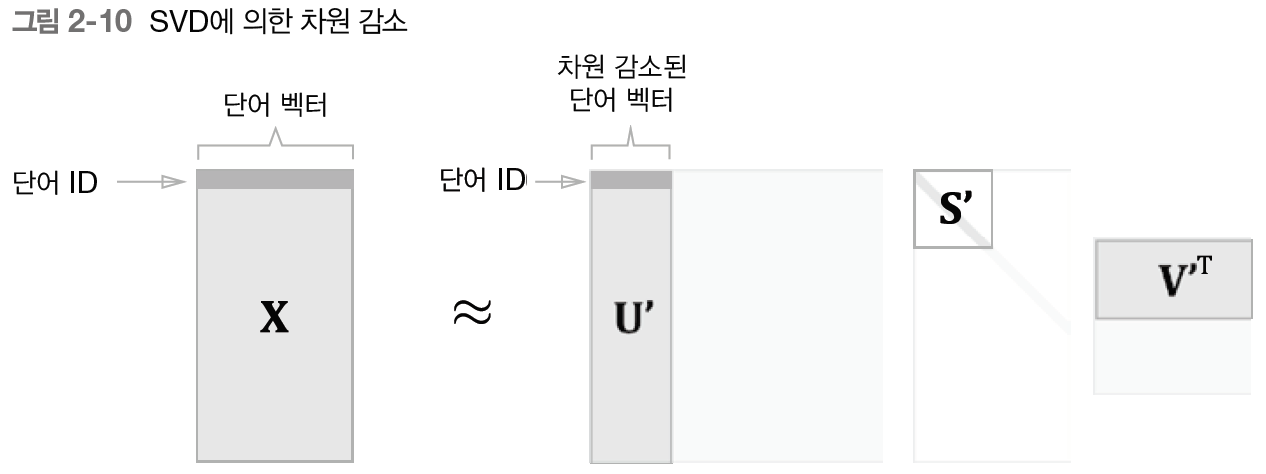

#### 2.4.3 SVD에 의한 차원 감소

[0 1 0 0 0 0 0]
[0.    1.807 0.    0.    0.    0.    0.   ]
[ 3.409e-01  0.000e+00 -3.886e-16 -1.205e-01 -9.323e-01 -1.110e-16
  1.958e-17]
[0.341 0.   ]


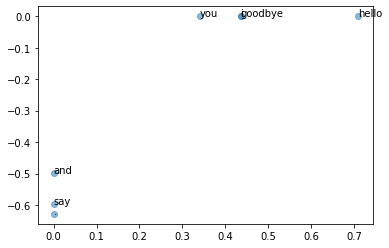

In [20]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

# SVD
U, S, V = np.linalg.svd(W)

print(C[0])
print(W[0])
print(U[0])

print(U[0, :2])

import matplotlib.pyplot as plt

for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1]))
    
plt.scatter(U[:, 0], U[:, 1], alpha = 0.5)
plt.show()